## Contents

- library and data import
- key questions 6 and 7

## Import libraries and data frame


In [1]:
# library imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create a string for the project folder path

path = r'/Users/Ashley/Desktop/Adam/Achievement 4/Instacart Analysis'

In [3]:
# import the latest data frame

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_4_10.pkl'))

In [4]:
# allow notebook to show all columns of the data frame

pd.set_option('display.max_columns', None)

In [6]:
# check the import

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent


## Compare customer profiles 

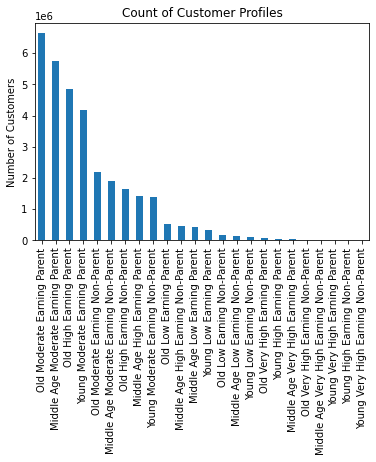

In [39]:
# view overall customer profile frequencies

profile_bar = df['customer_profile'].value_counts().plot.bar(ylabel="Number of Customers", title='Count of Customer Profiles')

In [38]:
# export

profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'E10', 'KQ5E cust_prof_bar.png'))

# Top 4: 
- old moderate earning parent
- middle age moderate earning parent
- old high earning parent
- Young moderate earning parent

# Next 5:
- old moderate earning non-parent
- middle age moderate earning non-parent
- old high earning non-parent
- middle age high earning parent
- young moderate earning non-parent

In [7]:
# create a subset with just the rows for the above referenced profiles

df_top9 = df.loc[df['customer_profile'].isin(['Old Moderate Earning Parent', 'Middle Age Moderate Earning Parent',
                                               'Old High Earning Parent', 'Young Moderate Earning Parent',
                                               'Old Moderate Earning Non-Parent', 'Middle Age Moderate Earning Non-Parent',
                                               'Old High Earning Non-Parent', 'Middle Age High Earning Parent',
                                               'Young Moderate Earning Non-Parent'])]

In [8]:
# check the subset

df_top9.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,parent_flag,order_profile,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,Meat Eater,Old Moderate Earning Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Normal Activity,Old,Moderate Earner,Parent,None Assigned,Old Moderate Earning Parent


In [9]:
df_top9.shape

(29964057, 41)

In [10]:
df_top9['customer_profile'].value_counts(dropna = False)

Old Moderate Earning Parent               6631771
Middle Age Moderate Earning Parent        5744772
Old High Earning Parent                   4846016
Young Moderate Earning Parent             4192310
Old Moderate Earning Non-Parent           2195890
Middle Age Moderate Earning Non-Parent    1896256
Old High Earning Non-Parent               1647976
Middle Age High Earning Parent            1423361
Young Moderate Earning Non-Parent         1385705
Name: customer_profile, dtype: int64

## Create a cross tab of frequency flag and customer profile

In [21]:
fqflag_cross = pd.crosstab(df_top9['customer_profile'], df_top9['frequency_flag'], dropna = False)

In [22]:
fqflag_cross

frequency_flag,Frequent Customer,Non Frequent Customer,Regular Customer
customer_profile,,,
Middle Age High Earning Parent,951503,159644,312214
Middle Age Moderate Earning Non-Parent,1254758,210425,431073
Middle Age Moderate Earning Parent,3851208,636017,1257547
Old High Earning Non-Parent,1111458,175314,361204
Old High Earning Parent,3241906,530959,1073146
Old Moderate Earning Non-Parent,1467784,243107,484999
Old Moderate Earning Parent,4396634,755839,1479298
Young Moderate Earning Non-Parent,914668,155006,316031
Young Moderate Earning Parent,2814888,460682,916740


In [23]:
fqflag_cross.to_clipboard()

In [24]:
# review frequency statistics for the DF as a whole

df['frequency_flag'].value_counts(dropna = False)

Frequent Customer        21559853
Regular Customer          7208564
Non Frequent Customer     3636437
NaN                             5
Name: frequency_flag, dtype: int64

66.53% of customers are frequent customers in the data frame as a whole. This holds true for our top customer profiles. The lowest percentage is 66.01% and the highest percentage is 67.44%. Minimal variation from the base line exists.

## Create a cross of customer profile and spending flag

In [14]:
spflag_cross = pd.crosstab(df_top9['customer_profile'], df_top9['spending_flag'], dropna = False)

In [15]:
spflag_cross

spending_flag,High Spender,Low Spender
customer_profile,,
Middle Age High Earning Parent,71325,1352036
Middle Age Moderate Earning Non-Parent,12889,1883367
Middle Age Moderate Earning Parent,44961,5699811
Old High Earning Non-Parent,34522,1613454
Old High Earning Parent,107253,4738763
Old Moderate Earning Non-Parent,14759,2181131
Old Moderate Earning Parent,44972,6586799
Young Moderate Earning Non-Parent,10047,1375658
Young Moderate Earning Parent,34707,4157603


In [16]:
spflag_cross.to_clipboard()

In [17]:
# review number of high and low spenders in the DF as a whole 

df['spending_flag'].value_counts(dropna = False)

Low Spender     31770614
High Spender      634245
Name: spending_flag, dtype: int64

In the full data set, 1.957% of customers are marked as "high spenders". When reviewing the top customer profiles the Middle Age High Earning Parent profile stands out with 5.011% high spenders. The next highest categories are Old High Earning Parent (2.213%) and Old High Earning Non Parent (2.095%). These are the only profiles above the average.

## Cross customer profile with order profile


In [25]:
ordprof_cross = pd.crosstab(df_top9['customer_profile'], df_top9['order_profile'], dropna = False)

In [26]:
ordprof_cross

order_profile,Drinker,Meat Eater,None Assigned,Parent w/ New Baby,Pet Owner
customer_profile,,,,,
Middle Age High Earning Parent,7005,34675,1358325,18621,4735
Middle Age Moderate Earning Non-Parent,8910,41211,1815063,25691,5381
Middle Age Moderate Earning Parent,25489,127660,5497499,78281,15843
Old High Earning Non-Parent,7736,37139,1576029,21944,5128
Old High Earning Parent,21087,115908,4627640,67126,14255
Old Moderate Earning Non-Parent,9745,47952,2103648,28411,6134
Old Moderate Earning Parent,29278,145279,6351991,84435,20788
Young Moderate Earning Non-Parent,5916,31388,1323945,20247,4209
Young Moderate Earning Parent,19667,96518,4006909,56194,13022


In [27]:
ordprof_cross.to_clipboard()

In [28]:
df['order_profile'].value_counts(dropna = False)

None Assigned         31020718
Meat Eater              708927
Parent w/ New Baby      423802
Drinker                 153696
Pet Owner                97716
Name: order_profile, dtype: int64

None of the customer profiles show signifigant derivation from the base line percentages of meat eaters, parents with new babies, drinkers, or pet owners. 

## Cross customer profile with departments

In [29]:
dept_cross = pd.crosstab(df_top9['customer_profile'], df_top9['department_id'], dropna = False)

In [30]:
dept_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle Age High Earning Parent,98768,1448,52350,420601,7005,12445,111788,4735,39283,1313,19061,34675,84171,30293,49342,245427,32270,18621,109933,46732,3100
Middle Age Moderate Earning Non-Parent,130159,2186,70855,565150,8910,16241,154950,5381,50253,2010,26486,41211,108511,39989,63424,317472,41286,25691,159347,62566,4178
Middle Age Moderate Earning Parent,392823,6109,206522,1709612,25489,48261,461153,15843,155069,6313,79714,127660,334848,121902,189474,969253,129137,78281,489580,185575,12154
Old High Earning Non-Parent,115897,1789,61037,494631,7736,14187,132075,5128,45121,1591,22741,37139,97273,34001,55094,278030,36048,21944,129033,54158,3323
Old High Earning Parent,339528,5422,180096,1451260,21087,40777,383797,14255,135065,4903,66921,115908,287505,101453,168498,815117,108020,67126,371659,156984,10635
Old Moderate Earning Non-Parent,151811,2432,79162,645505,9745,18128,181605,6134,58810,2233,30238,47952,126268,47566,71602,365671,48299,28411,197734,72304,4280
Old Moderate Earning Parent,457278,7351,236672,1938532,29278,54751,557847,20788,177364,7343,91205,145279,383073,142857,216671,1093783,152246,84435,606412,214455,14151
Young Moderate Earning Non-Parent,93495,1534,50461,413057,5916,11925,112201,4209,38171,1380,19045,31388,81171,29377,46673,231837,30550,20247,114812,45104,3152
Young Moderate Earning Parent,292018,4849,152880,1244050,19667,35623,329922,13022,115621,4617,56994,96518,245581,90678,143441,708753,92988,56194,343137,136440,9317


In [31]:
dept_cross.to_clipboard()

No one customer profile presents as buying any department in an outsized amount. I.E. Roughly 3 percent of orders come from department number 9 in all customer profiles. 

## Cross customer profile with region

In [32]:
region_cross = pd.crosstab(df_top9['customer_profile'], df_top9['region'], dropna = False)

In [33]:
region_cross

region,Midwest,Northeast,South,West
customer_profile,,,,
Middle Age High Earning Parent,332136,262366,442348,386511
Middle Age Moderate Earning Non-Parent,446897,323550,633485,492324
Middle Age Moderate Earning Parent,1346600,1018518,1940824,1438830
Old High Earning Non-Parent,386110,294684,531855,435327
Old High Earning Parent,1156071,868951,1607605,1213389
Old Moderate Earning Non-Parent,522641,383516,722160,567573
Old Moderate Earning Parent,1525560,1170163,2194206,1741842
Young Moderate Earning Non-Parent,317193,253759,473538,341215
Young Moderate Earning Parent,983698,730567,1400972,1077073


In [34]:
region_cross.to_clipboard()

No one region makes up an outsized percentage of customer profiles. I.E. roughly 23% of each customer profile resides in the midwest, 18% in the northeast, etc..